# LangGrpah 單代理通用

## 套件引入與數值初始化

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath("../src"))

In [2]:
from tw_textforge.agent.ai_model import AIModel
from tw_textforge.agent.printer import pretty_print_messages
from tw_textforge.agent.general.single_agent_graph import GeneralSingleAgentGraph

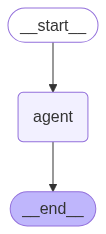

In [3]:
llm = AIModel().llm
generalgraph_obj = GeneralSingleAgentGraph(generator_llm=llm, generator_llm_tools=[])
generalgraph_obj.show_graph()

In [4]:
for chunk in generalgraph_obj.graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "在軟體工程中，什麼是資料庫?",
            }
        ]
    },
):
    pretty_print_messages(chunk, last_message=True)

Update from node agent:


================================== Ai Message ==================================
Name: generator_agent

在軟體工程中，資料庫是一個以結構化方式儲存及組織資料的系統。它允許使用者有效率地儲存、擷取、更新和管理大量資訊。你可以把它想像成一個電子化的檔案系統，但比傳統的檔案系統更強大且更有組織。

以下是有關資料庫的一些重要面向：

**關鍵概念：**

*   **資料模型：**定義資料在資料庫中組織及關聯的方式。常見的模型包括：
    *   **關聯式 (Relational):** 使用表格式 (rows and columns) 的結構來儲存資料，並利用關係 (例如：主鍵與外鍵) 定義資料間的關聯性。這是最常見的資料庫類型，例如 MySQL, PostgreSQL, Oracle, SQL Server。
    *   **NoSQL (Not Only SQL):** 提供更靈活的資料模型，適合處理非結構化的資料。例如：MongoDB (文件導向), Cassandra (欄式資料庫), Redis (鍵值對)。
    *   **物件導向 (Object-Oriented):** 將資料表示成物件的形式，類似於物件導向程式設計。
    *   **圖形資料庫 (Graph Databases):** 強調整資料間的關係，適合處理複雜的關聯性。例如：Neo4j。

*   **資料庫管理系統 (DBMS):** 是用於建立、管理和存取資料庫的軟體。它提供功能來定義結構、儲存資料、執行查詢、控制存取權限並確保資料的完整性。  常見的 DBMS 有 MySQL, PostgreSQL, MongoDB, Oracle, SQL Server 等。

*   **SQL (Structured Query Language):** 是用於與關聯式資料庫互動的標準語言。用來查詢、插入、更新和刪除資料。

*   **事務 (Transactions):** 是一系列的操作，這些操作被視為一個單元完成。事務保證資料庫的 ACID 屬性:
    *   **原子性 (Atomicity):** 事務中的所有操

In [5]:
chunk

{'agent': {'messages': [AIMessage(content='在軟體工程中，資料庫是一個以結構化方式儲存及組織資料的系統。它允許使用者有效率地儲存、擷取、更新和管理大量資訊。你可以把它想像成一個電子化的檔案系統，但比傳統的檔案系統更強大且更有組織。\n\n以下是有關資料庫的一些重要面向：\n\n**關鍵概念：**\n\n*   **資料模型：**定義資料在資料庫中組織及關聯的方式。常見的模型包括：\n    *   **關聯式 (Relational):** 使用表格式 (rows and columns) 的結構來儲存資料，並利用關係 (例如：主鍵與外鍵) 定義資料間的關聯性。這是最常見的資料庫類型，例如 MySQL, PostgreSQL, Oracle, SQL Server。\n    *   **NoSQL (Not Only SQL):** 提供更靈活的資料模型，適合處理非結構化的資料。例如：MongoDB (文件導向), Cassandra (欄式資料庫), Redis (鍵值對)。\n    *   **物件導向 (Object-Oriented):** 將資料表示成物件的形式，類似於物件導向程式設計。\n    *   **圖形資料庫 (Graph Databases):** 強調整資料間的關係，適合處理複雜的關聯性。例如：Neo4j。\n\n*   **資料庫管理系統 (DBMS):** 是用於建立、管理和存取資料庫的軟體。它提供功能來定義結構、儲存資料、執行查詢、控制存取權限並確保資料的完整性。  常見的 DBMS 有 MySQL, PostgreSQL, MongoDB, Oracle, SQL Server 等。\n\n*   **SQL (Structured Query Language):** 是用於與關聯式資料庫互動的標準語言。用來查詢、插入、更新和刪除資料。\n\n*   **事務 (Transactions):** 是一系列的操作，這些操作被視為一個單元完成。事務保證資料庫的 ACID 屬性:\n    *   **原子性 (Atomicity):** 事務中的所有操作要么全部成功，要么全部失敗。\n    *   **一致性 (Consistency):** 事務會將資料庫從一個有效狀態轉換到另一個有效